# Importing Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve,accuracy_score,auc

# Loading the Dataset

In [2]:
csv_path = "C:\\Users\\tejas\\OneDrive\\Desktop\\Class_work\\diabetes_prediction_dataset.csv" 
df = pd.read_csv(csv_path)

# Data Exploration / Initial Analysis

In [3]:
print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nSummary Statistics:")
print(df.describe())

First 5 rows of the dataset:
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               1000

# Feature Selection / Feature Engineering

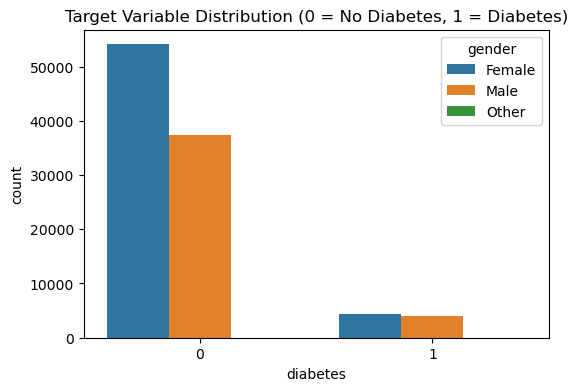

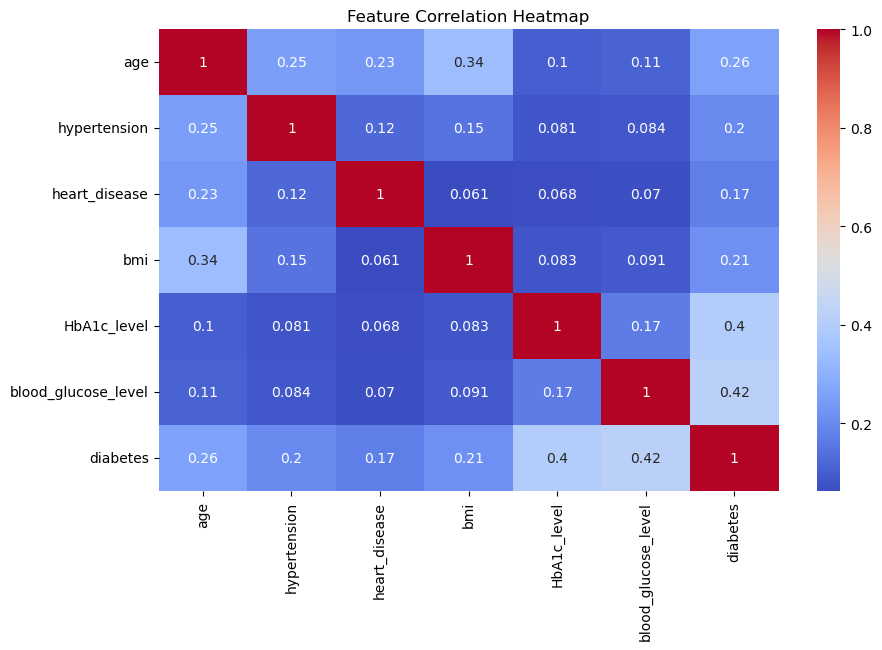

In [4]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="diabetes",hue="gender")
plt.title("Target Variable Distribution (0 = No Diabetes, 1 = Diabetes)")
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Splitting Dataset

In [5]:
df = pd.get_dummies(df, drop_first=True)

X = df.drop("diabetes", axis=1)
y = df["diabetes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Selection and Initialization

In [7]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


# Model Evaluation and Confusion Matrix


Model Accuracy: 0.95905

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     18292
           1       0.86      0.62      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000

ROC AUC Score: 0.9616916553018916


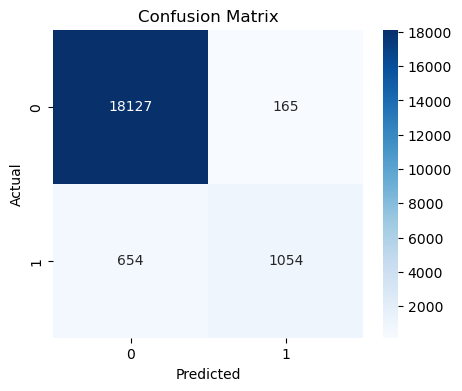

In [8]:
y_pred = model.predict(X_test)
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Model Interpretation and Visualization

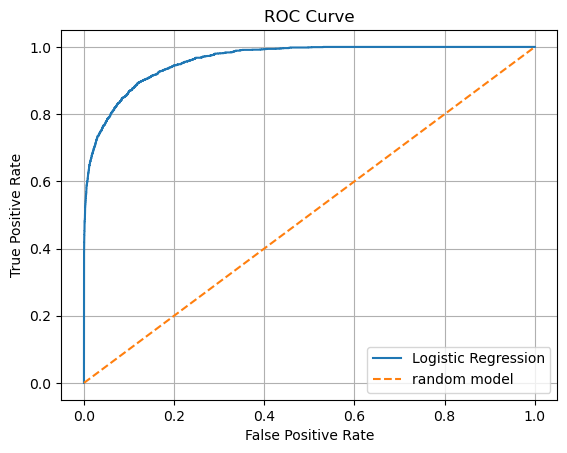

In [9]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.plot ([0,1],[0,1],label = 'random model' , ls = '--')
plt.legend()
plt.grid()
plt.show()

# Insights from Model


Feature Importance (Positive means higher chance of diabetes):
                        Feature  Coefficient  Odds Ratio
4                   HbA1c_level     2.492034   12.085835
5           blood_glucose_level     1.357586    3.886801
0                           age     1.054318    2.870018
3                           bmi     0.585145    1.795252
11        smoking_history_never     0.270346    1.310418
8       smoking_history_current     0.219303    1.245208
1                  hypertension     0.187978    1.206807
10       smoking_history_former     0.177316    1.194009
2                 heart_disease     0.144969    1.156004
12  smoking_history_not current     0.138738    1.148823
9          smoking_history_ever     0.129509    1.138270
6                   gender_Male     0.126788    1.135176
7                  gender_Other    -0.035030    0.965577


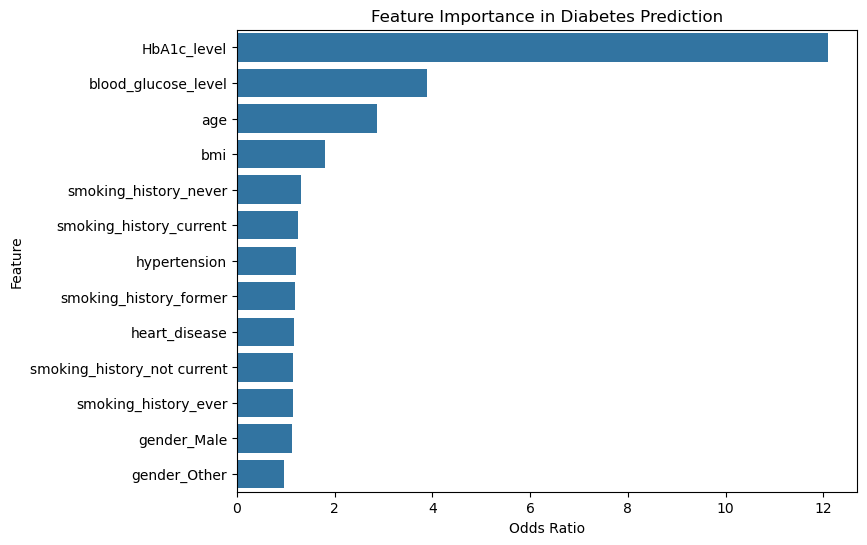

In [10]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)
coefficients['Odds Ratio'] = np.exp(coefficients['Coefficient'])

print("\nFeature Importance (Positive means higher chance of diabetes):")
print(coefficients)

plt.figure(figsize=(8,6))
sns.barplot(x="Odds Ratio", y="Feature", data=coefficients)
plt.title("Feature Importance in Diabetes Prediction")
plt.show()